# 加载数据

In [513]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("bank-full.csv",sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [515]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [516]:
df['duration'].value_counts()

duration
124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: count, Length: 1573, dtype: int64

y
no     39922
yes     5289
Name: count, dtype: int64
Proportion of 'yes': 0.11698480458295547
Proportion of 'no': 0.8830151954170445


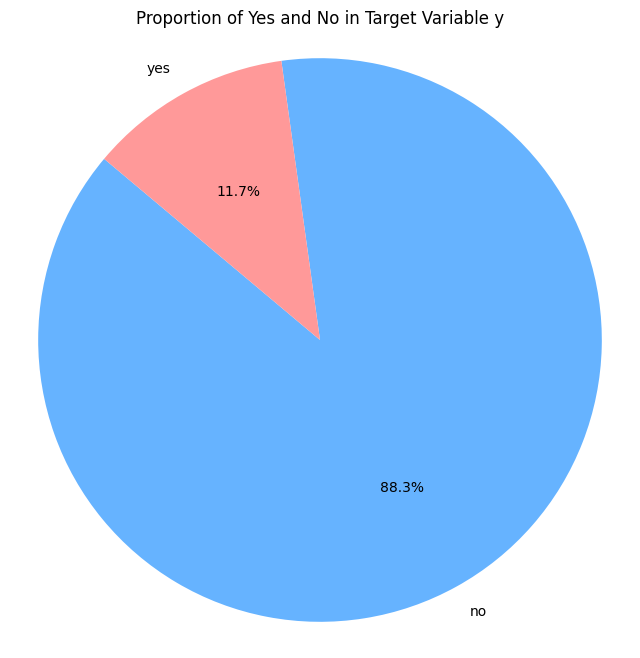

In [517]:
y_counts = df['y'].value_counts()
print(y_counts)
print("Proportion of 'yes':", y_counts['yes'] / len(df))
print("Proportion of 'no':", y_counts['no'] / len(df))
plt.figure(figsize=(8, 8))
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Proportion of Yes and No in Target Variable y')
plt.axis('equal') 
plt.show()

# 处理unkown数据

In [518]:
for col in df.columns:
    if type(df[col][0]) is str:
        print("unknown value count in "+col+" is "+ str(df[df[col]=='unknown']['y'].count()))
#总共四个属性有unkown，其中job和education数量较少，可以用最频繁出现的值补齐，剩下两个太多了直接当做一类属性

unknown value count in job is 288
unknown value count in marital is 0
unknown value count in education is 1857
unknown value count in default is 0
unknown value count in housing is 0
unknown value count in loan is 0
unknown value count in contact is 13020
unknown value count in month is 0
unknown value count in poutcome is 36959
unknown value count in y is 0


In [519]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [520]:
most_common_job_yes = df.loc[df['y'] == 'yes', 'job'].mode()[0]  #更换了替换的方式，使用对应标签里最常用的
most_common_job_no = df.loc[df['y'] == 'no', 'job'].mode()[0]
print(most_common_job_no,most_common_job_yes)

blue-collar management


In [521]:
df.loc[(df['y'] == 'yes') & (df['job'] == 'unknown'), 'job'] = most_common_job_yes
df.loc[(df['y'] == 'no') & (df['job'] == 'unknown'), 'job'] = most_common_job_no
df['job'].value_counts()

job
blue-collar      9986
management       9492
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

In [522]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [523]:
most_common_education_yes = df.loc[df['y'] == 'yes', 'education'].mode()[0]  #更换了替换的方式，使用对应标签里最常用的
most_common_education_no = df.loc[df['y'] == 'no', 'education'].mode()[0]
print(most_common_education_no,most_common_education_yes)

secondary secondary


In [524]:
df.loc[df["education"]=="unknown","education"]="secondary"#替换education中的unkown
df['education'].value_counts()

education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64

# 处理其他数据

#### 对于二值属性 default、housing、loan，编成0/1

In [525]:
#对于二值属性 default、housing、loan，编成0/1
df.default=df.default.replace({"yes":1,"no":0})
df['default'].value_counts()


default
0    44396
1      815
Name: count, dtype: int64

In [526]:
df.housing=df.housing.replace({"yes":1,"no":0})
df['housing'].value_counts()

housing
1    25130
0    20081
Name: count, dtype: int64

In [527]:
df.loan=df.loan.replace({"yes":1,"no":0})
df['loan'].value_counts()

loan
0    37967
1     7244
Name: count, dtype: int64

In [528]:
df.y=df.y.replace({"yes":1,"no":0})
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

#### 对于有序变量，可以根据顺序编码，如month、education

In [529]:
df['education'].value_counts()

education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64

In [530]:
df.education=df.education.replace({"primary":1,"secondary":2,"tertiary":3})
df['education'].value_counts()

education
2    25059
3    13301
1     6851
Name: count, dtype: int64

In [531]:
df['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [532]:
df.month=df.month.replace({"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12})
df['month'].value_counts()

month
5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: count, dtype: int64

#### 对于无序属性，使用one-hot编码，如job、marital、contact、poutcome

In [533]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,2,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,2,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,2,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,blue-collar,single,2,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0


In [534]:
df=pd.get_dummies(df,columns=['job','marital','contact','poutcome'],dtype=int)


#### 对数值型数据进行归一化

In [535]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# 需要归一化的列
columns_to_normalize = ['age', 'balance', 'duration', 'campaign', 'previous']
# 对这些列进行归一化
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
# 输出归一化后的数据
pdays_minus_one = df.loc[df['pdays'] == -1, 'pdays'].copy()
# 将 -1 转换为 -1.0
df.loc[df['pdays'] == -1, 'pdays'] = -1.0
# 对除了 -1.0 以外的数据进行归一化
df.loc[df['pdays'] != -1.0, 'pdays'] = scaler.fit_transform(df.loc[df['pdays'] != -1.0, 'pdays'].values.reshape(-1, 1)).flatten()
df.describe()



C:\Users\wang\AppData\Local\Temp\ipykernel_21512\2680503777.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.17241379 0.18965517 0.10344828 ... 0.04482759 0.21034483 0.21494253]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['pdays'] != -1.0, 'pdays'] = scaler.fit_transform(df.loc[df['pdays'] != -1.0, 'pdays'].values.reshape(-1, 1)).flatten()


,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.297873,2.142664,0.018027,0.085171,0.555838,0.160226,15.806419,6.144655,0.052494,0.028449,...,0.115171,0.601933,0.282896,0.647741,0.064276,0.287983,0.108403,0.040698,0.033421,0.817478
std,0.137906,0.652218,0.133049,0.027643,0.496878,0.366820,8.322476,2.408034,0.052364,0.049968,...,0.319232,0.489505,0.450411,0.477680,0.245247,0.452828,0.310892,0.197592,0.179735,0.386278
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,2.000000,0.000000,0.073457,0.000000,0.000000,8.000000,5.000000,0.020943,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.272727,2.000000,0.000000,0.076871,1.000000,0.000000,16.000000,6.000000,0.036600,0.016129,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.389610,3.000000,0.000000,0.085768,1.000000,0.000000,21.000000,8.000000,0.064864,0.032258,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [536]:
df['pdays'].value_counts()

pdays
-1.000000    36954
 0.208046      167
 0.104598      147
 0.103448      126
 0.209195      126
             ...  
 0.514943        1
 0.518391        1
 0.743678        1
 0.682759        1
 0.608046        1
Name: count, Length: 559, dtype: int64

#### 检查处理后的数据

In [537]:
df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,3,0,0.092259,1,0,5,5,0.053070,0.0,...,0,1,0,0,0,1,0,0,0,1
1,0.337662,2,0,0.073067,1,0,5,5,0.030704,0.0,...,0,0,1,0,0,1,0,0,0,1
2,0.194805,2,0,0.072822,1,1,5,5,0.015453,0.0,...,0,1,0,0,0,1,0,0,0,1
3,0.376623,2,0,0.086476,1,0,5,5,0.018707,0.0,...,0,1,0,0,0,1,0,0,0,1
4,0.194805,2,0,0.072812,0,0,5,5,0.040260,0.0,...,0,0,1,0,0,1,0,0,0,1


In [538]:
df.info() #最终数据，有34个属性

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  float64
 1   education          45211 non-null  int64  
 2   default            45211 non-null  int64  
 3   balance            45211 non-null  float64
 4   housing            45211 non-null  int64  
 5   loan               45211 non-null  int64  
 6   day                45211 non-null  int64  
 7   month              45211 non-null  int64  
 8   duration           45211 non-null  float64
 9   campaign           45211 non-null  float64
 10  pdays              45211 non-null  float64
 11  previous           45211 non-null  float64
 12  y                  45211 non-null  int64  
 13  job_admin.         45211 non-null  int32  
 14  job_blue-collar    45211 non-null  int32  
 15  job_entrepreneur   45211 non-null  int32  
 16  job_housemaid      452

# 混合采样

In [539]:
random_seed = 42
# 随机选择20%的数据作为测试集
df_test = df.sample(frac=0.2, random_state=random_seed)
# 剩余80%的数据作为训练集和验证集
df_train = df.drop(df_test.index)

In [540]:
from imblearn.combine import SMOTEENN,SMOTETomek
import pandas as pd

# 假设你的数据框名为 df，并且已经定义了特征和目标变量 X 和 y
X = df_train.drop(columns=['y'])  # 特征变量
y = df_train['y']  # 目标变量

# 使用 SMOTEENN 进行组合采样
smote_enn = SMOTEENN(sampling_strategy=1.0, random_state=42)  #这里的sampling_strategy代表最后正例是负例的几倍
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# 将采样后的数据重新组合成新的数据框 df_new
df_new = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['y'])], axis=1)


In [541]:
df_new['y'].value_counts()

y
1    28342
0    23944
Name: count, dtype: int64

# 选择特征

In [542]:
# 打印与 y 的相关系数
corr_matrix = df.corr()
corr_with_y = corr_matrix['y'].sort_values(ascending=False)
print(corr_with_y)

y                    1.000000
duration             0.394521
poutcome_success     0.306788
pdays                0.156257
contact_cellular     0.135873
previous             0.093236
job_retired          0.079245
job_student          0.076897
education            0.068633
marital_single       0.063526
balance              0.052838
job_management       0.037948
poutcome_other       0.031955
age                  0.025155
job_unemployed       0.020390
month                0.018717
contact_telephone    0.014042
poutcome_failure     0.009885
job_admin.           0.005637
marital_divorced     0.002772
job_self-employed    0.000855
job_technician      -0.008970
job_housemaid       -0.015195
job_entrepreneur    -0.019662
default             -0.022419
job_services        -0.027864
day                 -0.028348
marital_married     -0.060260
loan                -0.068185
campaign            -0.073172
job_blue-collar     -0.076346
housing             -0.139173
contact_unknown     -0.150935
poutcome_u

In [543]:
feature_list = ['age', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']
print(feature_list)

['age', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [554]:
import pandas as pd
from sklearn.model_selection import KFold
# 相关度最高的10个特征(正负各5个)
features = ['duration', 'poutcome_success', 'pdays', 'poutcome_unknown', 
            'contact_unknown', 'housing', 'contact_cellular', 'job_blue-collar', 'previous', 
            'campaign']
# 6、8、10个数量的特征：正负相关度前3、4、5
feature_sets = {
    '6_features': features[:6],
    '8_features': features[:8],
    '10_features': features,
    'all':feature_list
}
# 初始化5折交叉验证对象
kf = KFold(n_splits=5, shuffle=True, random_state=42)#一定不要改这里，这里保证划分的数据每次都是相同的，每人使用的数据是一样的
# 用于存储不同特征集的交叉验证数据
five_fold_data = {
    '6_features': {'train': [], 'dev': []}, #这里是验证集
    '8_features': {'train': [], 'dev': []}, 
    '10_features': {'train': [], 'dev': []},
    'all':{'train':[],'dev':[]}
}

for name, feature_set in feature_sets.items():
    selected_features = ['y'] + feature_set
    df_selected = df_new[selected_features]
    x = df_selected.drop('y', axis=1)
    y = df_selected['y']
    for train_index, test_index in kf.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # 保存训练集和测试集
        five_fold_data[name]['train'].append((x_train, y_train))
        five_fold_data[name]['dev'].append((x_test, y_test))

df_test_feature6=df_test[feature_sets["6_features"]]   #这个是测试集
df_test_feature8=df_test[feature_sets["8_features"]]
df_test_feature10=df_test[feature_sets["10_features"]]
df_test_featureall=df_test[feature_sets["all"]]

In [555]:
#提取数据示例,提取5个特征的一折训练数据
x_train_fold1_10feature, y_train_fold1_10feature = five_fold_data['10_features']['train'][0]
x_train_fold1_all, y_train_fold1_all = five_fold_data['all']['train'][0]
#print(x_train_fold1_10feature,y_train_fold1_10feature)

In [556]:
#提取数据示例,提取5个特征的一折测试数据
x_dev_fold1_10feature, y_dev_fold1_10feature = five_fold_data['10_features']['dev'][0]
x_dev_fold1_all, y_dev_fold1_all = five_fold_data['all']['dev'][0]
#print(x_test_fold1_10feature,y_test_fold1_10feature)

In [559]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef

# 使用随机森林分类器
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train_fold1_10feature, y_train_fold1_10feature)

# 计算训练集和测试集的MCC
y_train_pred = clf.predict(x_train_fold1_10feature)
y_dev_pred = clf.predict(x_dev_fold1_10feature)
mcc_train = matthews_corrcoef(y_train_fold1_10feature, y_train_pred)
mcc_dev = matthews_corrcoef(y_dev_fold1_10feature, y_dev_pred)

print(f"Training MCC: {mcc_train}")
print(f"Dev MCC: {mcc_dev}")
X_test = df_test_feature10
y_test = df_test['y']

# 使用分类器进行预测
y_pred = clf.predict(X_test)

# 计算MCC
mcc_20 = matthews_corrcoef(y_test, y_pred)

print(f"Test MCC: {mcc_20}")


Training MCC: 0.9778217154626747
Dev MCC: 0.8146231477231567
Test MCC: 0.4288259409846947


In [560]:
from xgboost import XGBClassifier
from sklearn.metrics import matthews_corrcoef

# 使用XGBoost分类器
clf = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
clf.fit(x_train_fold1_10feature, y_train_fold1_10feature)

# 计算训练集和测试集的MCC
y_train_pred = clf.predict(x_train_fold1_10feature)
y_dev_pred = clf.predict(x_dev_fold1_10feature)
mcc_train = matthews_corrcoef(y_train_fold1_10feature, y_train_pred)
mcc_dev = matthews_corrcoef(y_dev_fold1_10feature, y_dev_pred)

print(f"Training MCC: {mcc_train}")
print(f"Dev MCC: {mcc_dev}")

# 使用分类器进行预测
X_test = df_test_feature10
y_test = df_test['y']
y_pred = clf.predict(X_test)

# 计算MCC
mcc_20 = matthews_corrcoef(y_test, y_pred)

print(f"Test MCC: {mcc_20}")


Training MCC: 0.860027539052855
Dev MCC: 0.8340412111659756
Test MCC: 0.48026931947574897


d:\anaconda3\envs\selfcheckgpt\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:51:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [561]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef

# 使用随机森林分类器
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train_fold1_all, y_train_fold1_all)

# 计算训练集和测试集的MCC
y_train_pred = clf.predict(x_train_fold1_all)
y_dev_pred = clf.predict(x_dev_fold1_all)
mcc_train = matthews_corrcoef(y_train_fold1_all, y_train_pred)
mcc_dev = matthews_corrcoef(y_dev_fold1_all, y_dev_pred)

print(f"Training MCC: {mcc_train}")
print(f"Dev MCC: {mcc_dev}")
X_test = df_test_featureall
y_test = df_test['y']

# 使用分类器进行预测
y_pred = clf.predict(X_test)

# 计算MCC
mcc_20 = matthews_corrcoef(y_test, y_pred)

print(f"Test MCC: {mcc_20}")


Training MCC: 1.0
Dev MCC: 0.9266128328119988
Test MCC: 0.5399961631572231


In [562]:
from xgboost import XGBClassifier
from sklearn.metrics import matthews_corrcoef

# 使用XGBoost分类器
clf = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
clf.fit(x_train_fold1_all, y_train_fold1_all)

# 计算训练集和测试集的MCC
y_train_pred = clf.predict(x_train_fold1_all)
y_dev_pred = clf.predict(x_dev_fold1_all)
mcc_train = matthews_corrcoef(y_train_fold1_all, y_train_pred)
mcc_dev = matthews_corrcoef(y_dev_fold1_all, y_dev_pred)

print(f"Training MCC: {mcc_train}")
print(f"Dev MCC: {mcc_dev}")

# 使用分类器进行预测
X_test = df_test_featureall
y_test = df_test['y']
y_pred = clf.predict(X_test)

# 计算MCC
mcc_20 = matthews_corrcoef(y_test, y_pred)

print(f"Test MCC: {mcc_20}")

d:\anaconda3\envs\selfcheckgpt\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:52:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training MCC: 0.9733270788279
Dev MCC: 0.9394466432460097
Test MCC: 0.5642630188387924
